This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
import pandas as pd # standard naming convention
import numpy as np
import datetime

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

In [5]:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-11-25 18:40:52--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-25 18:40:53--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ae37a4686cf796e569a6dae4f.dl.dropboxusercontent.com/cd/0/inline/BapEA_2o_UnVpxmBeZfP4fs5_tqdAu5KMDSbM-_V_Qj8L-6QI-9YE3qqMR96mVTLmCLVjE0YJkVxtV6fB_2C692QVdMoF7Eiz8hJMOptfvtToJAp-P18jh3qmYn8Sauvw4IQZloWXErSorzy0McEL4Vk/file# [following]
--2021-11-25 18:40:53--  https://uc2ae37a4686cf796e569a6dae4f.dl.dropboxusercontent.com/cd/0/inline/BapEA_2o_UnVpxmBeZfP4fs5_tqdAu5KMDSbM-_V_Qj8L-6QI-9YE3qqMR96mVTLmCLVjE0YJkVxtV6fB_2C692QVdMoF7Eiz8hJMOptfvt

  4550K .......... .......... .......... .......... .......... 14%  139M 7s
  4600K .......... .......... .......... .......... .......... 14% 2,96M 7s
  4650K .......... .......... .......... .......... .......... 14%  220M 7s
  4700K .......... .......... .......... .......... .......... 14%  404M 7s
  4750K .......... .......... .......... .......... .......... 14%  397M 7s
  4800K .......... .......... .......... .......... .......... 14%  177M 6s
  4850K .......... .......... .......... .......... .......... 15% 71,9M 6s
  4900K .......... .......... .......... .......... .......... 15%  250M 6s
  4950K .......... .......... .......... .......... .......... 15%  113M 6s
  5000K .......... .......... .......... .......... .......... 15%  239M 6s
  5050K .......... .......... .......... .......... .......... 15%  206M 6s
  5100K .......... .......... .......... .......... .......... 15%  209M 6s
  5150K .......... .......... .......... .......... .......... 16%  103M 6s
  5200K ....

 19900K .......... .......... .......... .......... .......... 61% 11,6M 2s
 19950K .......... .......... .......... .......... .......... 61% 6,04M 2s
 20000K .......... .......... .......... .......... .......... 61% 6,02M 2s
 20050K .......... .......... .......... .......... .......... 62% 9,63M 2s
 20100K .......... .......... .......... .......... .......... 62% 19,8M 2s
 20150K .......... .......... .......... .......... .......... 62% 7,39M 2s
 20200K .......... .......... .......... .......... .......... 62% 12,1M 2s
 20250K .......... .......... .......... .......... .......... 62% 9,31M 2s
 20300K .......... .......... .......... .......... .......... 62% 6,64M 2s
 20350K .......... .......... .......... .......... .......... 62% 5,79M 2s
 20400K .......... .......... .......... .......... .......... 63% 7,65M 2s
 20450K .......... .......... .......... .......... .......... 63% 16,8M 2s
 20500K .......... .......... .......... .......... .......... 63% 6,79M 2s
 20550K ....

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [4]:
data = 'data/data_000637.txt'
X = pd.read_csv(data,header=None, low_memory=False)

print(X)

N = 15000
    
a = [X.loc[i] for i in range(0, N+1)]
a = np.array(a)

a.reshape(N+1,6)
list1 = a.tolist()

colm = list1[0]
row = list1[1:]

df1 = pd.DataFrame(row, columns = colm, dtype = 'float')

df1


            0     1            2           3           4         5
0        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1           1     0          123  3869200167        2374        26
2           1     0          124  3869200167        2374        27
3           1     0           63  3869200167        2553        28
4           1     0           64  3869200167        2558        19
...       ...   ...          ...         ...         ...       ...
1310716     1     0           62  3869211171         762        14
1310717     1     1            4  3869211171         763        11
1310718     1     0           64  3869211171         764         0
1310719     1     0          139  3869211171         769         0
1310720     1     0           61  3869211171         762        18

[1310721 rows x 6 columns]


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1.0,0.0,123.0,3.869200e+09,2374.0,26.0
1,1.0,0.0,124.0,3.869200e+09,2374.0,27.0
2,1.0,0.0,63.0,3.869200e+09,2553.0,28.0
3,1.0,0.0,64.0,3.869200e+09,2558.0,19.0
4,1.0,0.0,64.0,3.869200e+09,2760.0,25.0
...,...,...,...,...,...,...
14995,1.0,1.0,4.0,3.869200e+09,3399.0,9.0
14996,1.0,1.0,17.0,3.869200e+09,3400.0,15.0
14997,1.0,1.0,10.0,3.869200e+09,3530.0,16.0
14998,1.0,1.0,8.0,3.869200e+09,3533.0,18.0


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [5]:
maxBX = max(df1['BX_COUNTER'])

print("The number of BX in a ORBIT: {}".format(maxBX+1))

The number of BX in a ORBIT: 3564.0


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [6]:
dur = ((df1['TDC_MEAS']*25/30) + (df1['BX_COUNTER']*25) + (df1['ORBIT_CNT']*(maxBX + 1)*25))*pow(10, -9)

for i in range (0, N):
    print("Row:{} Duration = {}".format(i, datetime.timedelta(seconds = dur[i])))

Row:0 Duration = 3 days, 23:45:45.734939
Row:1 Duration = 3 days, 23:45:45.734939
Row:2 Duration = 3 days, 23:45:45.734944
Row:3 Duration = 3 days, 23:45:45.734944
Row:4 Duration = 3 days, 23:45:45.734949
Row:5 Duration = 3 days, 23:45:45.734949
Row:6 Duration = 3 days, 23:45:45.734949
Row:7 Duration = 3 days, 23:45:45.734949
Row:8 Duration = 3 days, 23:45:45.734949
Row:9 Duration = 3 days, 23:45:45.734949
Row:10 Duration = 3 days, 23:45:45.734949
Row:11 Duration = 3 days, 23:45:45.734949
Row:12 Duration = 3 days, 23:45:45.734950
Row:13 Duration = 3 days, 23:45:45.734949
Row:14 Duration = 3 days, 23:45:45.734949
Row:15 Duration = 3 days, 23:45:45.734950
Row:16 Duration = 3 days, 23:45:45.734949
Row:17 Duration = 3 days, 23:45:45.734949
Row:18 Duration = 3 days, 23:45:45.734950
Row:19 Duration = 3 days, 23:45:45.734950
Row:20 Duration = 3 days, 23:45:45.734949
Row:21 Duration = 3 days, 23:45:45.734949
Row:22 Duration = 3 days, 23:45:45.734949
Row:23 Duration = 3 days, 23:45:45.734950
Ro

Row:2076 Duration = 3 days, 23:45:45.736764
Row:2077 Duration = 3 days, 23:45:45.736765
Row:2078 Duration = 3 days, 23:45:45.736765
Row:2079 Duration = 3 days, 23:45:45.736765
Row:2080 Duration = 3 days, 23:45:45.736765
Row:2081 Duration = 3 days, 23:45:45.736764
Row:2082 Duration = 3 days, 23:45:45.736765
Row:2083 Duration = 3 days, 23:45:45.736764
Row:2084 Duration = 3 days, 23:45:45.736765
Row:2085 Duration = 3 days, 23:45:45.736764
Row:2086 Duration = 3 days, 23:45:45.736765
Row:2087 Duration = 3 days, 23:45:45.736765
Row:2088 Duration = 3 days, 23:45:45.736765
Row:2089 Duration = 3 days, 23:45:45.736765
Row:2090 Duration = 3 days, 23:45:45.736765
Row:2091 Duration = 3 days, 23:45:45.736765
Row:2092 Duration = 3 days, 23:45:45.736765
Row:2093 Duration = 3 days, 23:45:45.736765
Row:2094 Duration = 3 days, 23:45:45.736765
Row:2095 Duration = 3 days, 23:45:45.736765
Row:2096 Duration = 3 days, 23:45:45.736770
Row:2097 Duration = 3 days, 23:45:45.736770
Row:2098 Duration = 3 days, 23:4

Row:3560 Duration = 3 days, 23:45:45.738071
Row:3561 Duration = 3 days, 23:45:45.738071
Row:3562 Duration = 3 days, 23:45:45.738071
Row:3563 Duration = 3 days, 23:45:45.738071
Row:3564 Duration = 3 days, 23:45:45.738071
Row:3565 Duration = 3 days, 23:45:45.738071
Row:3566 Duration = 3 days, 23:45:45.738071
Row:3567 Duration = 3 days, 23:45:45.738071
Row:3568 Duration = 3 days, 23:45:45.738071
Row:3569 Duration = 3 days, 23:45:45.738071
Row:3570 Duration = 3 days, 23:45:45.738071
Row:3571 Duration = 3 days, 23:45:45.738071
Row:3572 Duration = 3 days, 23:45:45.738071
Row:3573 Duration = 3 days, 23:45:45.738071
Row:3574 Duration = 3 days, 23:45:45.738072
Row:3575 Duration = 3 days, 23:45:45.738072
Row:3576 Duration = 3 days, 23:45:45.738072
Row:3577 Duration = 3 days, 23:45:45.738072
Row:3578 Duration = 3 days, 23:45:45.738072
Row:3579 Duration = 3 days, 23:45:45.738072
Row:3580 Duration = 3 days, 23:45:45.738072
Row:3581 Duration = 3 days, 23:45:45.738072
Row:3582 Duration = 3 days, 23:4

Row:5867 Duration = 3 days, 23:45:45.740144
Row:5868 Duration = 3 days, 23:45:45.740144
Row:5869 Duration = 3 days, 23:45:45.740144
Row:5870 Duration = 3 days, 23:45:45.740144
Row:5871 Duration = 3 days, 23:45:45.740148
Row:5872 Duration = 3 days, 23:45:45.740159
Row:5873 Duration = 3 days, 23:45:45.740159
Row:5874 Duration = 3 days, 23:45:45.740159
Row:5875 Duration = 3 days, 23:45:45.740159
Row:5876 Duration = 3 days, 23:45:45.740159
Row:5877 Duration = 3 days, 23:45:45.740159
Row:5878 Duration = 3 days, 23:45:45.740159
Row:5879 Duration = 3 days, 23:45:45.740159
Row:5880 Duration = 3 days, 23:45:45.740159
Row:5881 Duration = 3 days, 23:45:45.740159
Row:5882 Duration = 3 days, 23:45:45.740159
Row:5883 Duration = 3 days, 23:45:45.740159
Row:5884 Duration = 3 days, 23:45:45.740159
Row:5885 Duration = 3 days, 23:45:45.740159
Row:5886 Duration = 3 days, 23:45:45.740159
Row:5887 Duration = 3 days, 23:45:45.740186
Row:5888 Duration = 3 days, 23:45:45.740190
Row:5889 Duration = 3 days, 23:4

Row:7769 Duration = 3 days, 23:45:45.741810
Row:7770 Duration = 3 days, 23:45:45.741813
Row:7771 Duration = 3 days, 23:45:45.741813
Row:7772 Duration = 3 days, 23:45:45.741813
Row:7773 Duration = 3 days, 23:45:45.741813
Row:7774 Duration = 3 days, 23:45:45.741813
Row:7775 Duration = 3 days, 23:45:45.741813
Row:7776 Duration = 3 days, 23:45:45.741813
Row:7777 Duration = 3 days, 23:45:45.741816
Row:7778 Duration = 3 days, 23:45:45.741816
Row:7779 Duration = 3 days, 23:45:45.741817
Row:7780 Duration = 3 days, 23:45:45.741821
Row:7781 Duration = 3 days, 23:45:45.741821
Row:7782 Duration = 3 days, 23:45:45.741821
Row:7783 Duration = 3 days, 23:45:45.741821
Row:7784 Duration = 3 days, 23:45:45.741821
Row:7785 Duration = 3 days, 23:45:45.741826
Row:7786 Duration = 3 days, 23:45:45.741829
Row:7787 Duration = 3 days, 23:45:45.741829
Row:7788 Duration = 3 days, 23:45:45.741829
Row:7789 Duration = 3 days, 23:45:45.741834
Row:7790 Duration = 3 days, 23:45:45.741834
Row:7791 Duration = 3 days, 23:4

Row:9442 Duration = 3 days, 23:45:45.743325
Row:9443 Duration = 3 days, 23:45:45.743325
Row:9444 Duration = 3 days, 23:45:45.743325
Row:9445 Duration = 3 days, 23:45:45.743325
Row:9446 Duration = 3 days, 23:45:45.743325
Row:9447 Duration = 3 days, 23:45:45.743325
Row:9448 Duration = 3 days, 23:45:45.743328
Row:9449 Duration = 3 days, 23:45:45.743328
Row:9450 Duration = 3 days, 23:45:45.743328
Row:9451 Duration = 3 days, 23:45:45.743329
Row:9452 Duration = 3 days, 23:45:45.743329
Row:9453 Duration = 3 days, 23:45:45.743328
Row:9454 Duration = 3 days, 23:45:45.743329
Row:9455 Duration = 3 days, 23:45:45.743330
Row:9456 Duration = 3 days, 23:45:45.743330
Row:9457 Duration = 3 days, 23:45:45.743330
Row:9458 Duration = 3 days, 23:45:45.743330
Row:9459 Duration = 3 days, 23:45:45.743330
Row:9460 Duration = 3 days, 23:45:45.743330
Row:9461 Duration = 3 days, 23:45:45.743330
Row:9462 Duration = 3 days, 23:45:45.743338
Row:9463 Duration = 3 days, 23:45:45.743338
Row:9464 Duration = 3 days, 23:4

Row:10979 Duration = 3 days, 23:45:45.744667
Row:10980 Duration = 3 days, 23:45:45.744667
Row:10981 Duration = 3 days, 23:45:45.744667
Row:10982 Duration = 3 days, 23:45:45.744669
Row:10983 Duration = 3 days, 23:45:45.744669
Row:10984 Duration = 3 days, 23:45:45.744678
Row:10985 Duration = 3 days, 23:45:45.744679
Row:10986 Duration = 3 days, 23:45:45.744679
Row:10987 Duration = 3 days, 23:45:45.744679
Row:10988 Duration = 3 days, 23:45:45.744679
Row:10989 Duration = 3 days, 23:45:45.744679
Row:10990 Duration = 3 days, 23:45:45.744680
Row:10991 Duration = 3 days, 23:45:45.744680
Row:10992 Duration = 3 days, 23:45:45.744686
Row:10993 Duration = 3 days, 23:45:45.744686
Row:10994 Duration = 3 days, 23:45:45.744686
Row:10995 Duration = 3 days, 23:45:45.744686
Row:10996 Duration = 3 days, 23:45:45.744686
Row:10997 Duration = 3 days, 23:45:45.744686
Row:10998 Duration = 3 days, 23:45:45.744688
Row:10999 Duration = 3 days, 23:45:45.744688
Row:11000 Duration = 3 days, 23:45:45.744688
Row:11001 

Row:13102 Duration = 3 days, 23:45:45.746551
Row:13103 Duration = 3 days, 23:45:45.746551
Row:13104 Duration = 3 days, 23:45:45.746551
Row:13105 Duration = 3 days, 23:45:45.746552
Row:13106 Duration = 3 days, 23:45:45.746552
Row:13107 Duration = 3 days, 23:45:45.746552
Row:13108 Duration = 3 days, 23:45:45.746552
Row:13109 Duration = 3 days, 23:45:45.746552
Row:13110 Duration = 3 days, 23:45:45.746552
Row:13111 Duration = 3 days, 23:45:45.746552
Row:13112 Duration = 3 days, 23:45:45.746552
Row:13113 Duration = 3 days, 23:45:45.746553
Row:13114 Duration = 3 days, 23:45:45.746553
Row:13115 Duration = 3 days, 23:45:45.746552
Row:13116 Duration = 3 days, 23:45:45.746553
Row:13117 Duration = 3 days, 23:45:45.746553
Row:13118 Duration = 3 days, 23:45:45.746552
Row:13119 Duration = 3 days, 23:45:45.746553
Row:13120 Duration = 3 days, 23:45:45.746553
Row:13121 Duration = 3 days, 23:45:45.746553
Row:13122 Duration = 3 days, 23:45:45.746553
Row:13123 Duration = 3 days, 23:45:45.746555
Row:13124 

Row:14941 Duration = 3 days, 23:45:45.748161
Row:14942 Duration = 3 days, 23:45:45.748161
Row:14943 Duration = 3 days, 23:45:45.748161
Row:14944 Duration = 3 days, 23:45:45.748161
Row:14945 Duration = 3 days, 23:45:45.748161
Row:14946 Duration = 3 days, 23:45:45.748161
Row:14947 Duration = 3 days, 23:45:45.748161
Row:14948 Duration = 3 days, 23:45:45.748161
Row:14949 Duration = 3 days, 23:45:45.748162
Row:14950 Duration = 3 days, 23:45:45.748161
Row:14951 Duration = 3 days, 23:45:45.748161
Row:14952 Duration = 3 days, 23:45:45.748161
Row:14953 Duration = 3 days, 23:45:45.748162
Row:14954 Duration = 3 days, 23:45:45.748161
Row:14955 Duration = 3 days, 23:45:45.748162
Row:14956 Duration = 3 days, 23:45:45.748163
Row:14957 Duration = 3 days, 23:45:45.748163
Row:14958 Duration = 3 days, 23:45:45.748163
Row:14959 Duration = 3 days, 23:45:45.748163
Row:14960 Duration = 3 days, 23:45:45.748163
Row:14961 Duration = 3 days, 23:45:45.748163
Row:14962 Duration = 3 days, 23:45:45.748163
Row:14963 

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [10]:
colm.append('Abs Time')

df1['Abs Time'] = [dur[i] for i in range(0, N)]

df1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs Time
0,1.0,0.0,123.0,3.869200e+09,2374.0,26.0,344745.734939
1,1.0,0.0,124.0,3.869200e+09,2374.0,27.0,344745.734939
2,1.0,0.0,63.0,3.869200e+09,2553.0,28.0,344745.734944
3,1.0,0.0,64.0,3.869200e+09,2558.0,19.0,344745.734944
4,1.0,0.0,64.0,3.869200e+09,2760.0,25.0,344745.734949
...,...,...,...,...,...,...,...
14995,1.0,1.0,4.0,3.869200e+09,3399.0,9.0,344745.748241
14996,1.0,1.0,17.0,3.869200e+09,3400.0,15.0,344745.748241
14997,1.0,1.0,10.0,3.869200e+09,3530.0,16.0,344745.748244
14998,1.0,1.0,8.0,3.869200e+09,3533.0,18.0,344745.748244


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [11]:
gk = df1.groupby('TDC_CHANNEL')

a = gk.count().sort_values(by ='HEAD' ,ascending = False)

a[:63]

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Abs Time
TDC_CHANNEL,,,,,,
139.0,1268,1268,1268,1268,1268,1268
64.0,752,752,752,752,752,752
63.0,749,749,749,749,749,749


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [12]:
orbitsHit = len(df1.groupby('ORBIT_CNT').size())
print("Number of non-empty orbits: {}".format(orbitsHit)) 

emptyOrbits = (max(df1['ORBIT_CNT']) - min(df1['ORBIT_CNT']) - orbitsHit + 1)
print("Number of empty orbits:{}".format(emptyOrbits)) 
    
orbits_139 = len((df1[df1['TDC_CHANNEL'] == 139.0]).groupby('ORBIT_CNT').size())
print("Orbits with at least one TDC_CHANNEL 139:{}".format(orbits_139))

orbitsWithout_139 = (max(df1['ORBIT_CNT']) - min(df1['ORBIT_CNT'])) - orbits_139 + 1
print("Orbits without TDC_CHANNEL 139:{}".format(orbitsWithout_139))
    

Number of non-empty orbits: 150
Number of empty orbits:0.0
Orbits with at least one TDC_CHANNEL 139:150
Orbits without TDC_CHANNEL 139:0.0


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

Text(0, 0.5, 'COUNTS')

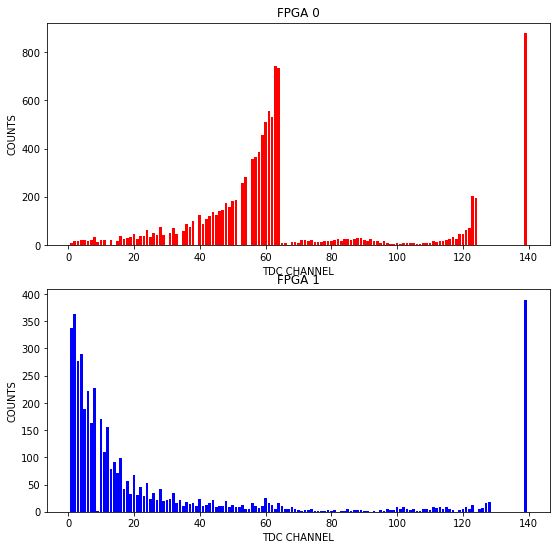

In [18]:
import matplotlib.pyplot as plt

FPGA0 = df1[df1['FPGA'] == 0].groupby('TDC_CHANNEL').count()['HEAD'].values
i0 = df1[df1['FPGA'] == 0].groupby('TDC_CHANNEL').count().index

FPGA1 = df1[df1['FPGA'] == 1].groupby('TDC_CHANNEL').count()['HEAD'].values
i1 = df1[df1['FPGA'] == 1].groupby('TDC_CHANNEL').count().index

fig, (ax1, ax2) = plt.subplots(2, figsize = (9,9))

ax1.bar(i0, FPGA0, color = 'r')
ax1.set_title('FPGA 0')
ax1.set_xlabel('TDC CHANNEL')
ax1.set_ylabel('COUNTS')

ax2.bar(i1, FPGA1, color ='b')
ax2.set_title('FPGA 1')
ax2.set_xlabel('TDC CHANNEL')
ax2.set_ylabel('COUNTS')